In [1]:
import random
plantwidth = []
plantheight= []
phvalue=[]
temp=[]
humid=[]#in percentange
moist=[]#in percentange
growth=[]#growth
for i in range(1,10001):
    n = random.randint(14,40)
    m = random.randint(15,120)
    l=random.randint(3,10)
    j=random.randint(17,40)
    k=random.randint(40,110)
    z=random.randint(10,45)
    plantwidth.append(n)
    plantheight.append(m)
    phvalue.append(l)
    temp.append(j)
    humid.append(k)
    moist.append(z)

In [2]:
import pandas as pd
df = pd.DataFrame(list(zip(plantheight, plantwidth,phvalue,temp,humid,moist)),columns =['plantheight','plantwidth','phvalue','temp','humid','moist'])


In [3]:
df

,plantheight,plantwidth,phvalue,temp,humid,moist
0,120,24,9,36,55,29
1,94,25,8,27,104,26
2,73,22,7,29,67,21
3,112,39,10,24,73,14
4,17,31,8,33,41,43
...,...,...,...,...,...,...
9995,111,30,3,31,101,19
9996,44,28,3,21,49,37
9997,113,23,3,39,73,20
9998,112,36,7,17,52,39


In [4]:
t=df['temp'].to_list()

In [5]:
light=[]
for i in t:
    ans=i*289
    light.append(ans)

In [6]:
df1=pd.DataFrame(light,columns=['light'])

In [7]:
df['growth'] = df['plantheight']/df['plantwidth']

In [8]:
df

,plantheight,plantwidth,phvalue,temp,humid,moist,growth
0,120,24,9,36,55,29,5.000000
1,94,25,8,27,104,26,3.760000
2,73,22,7,29,67,21,3.318182
3,112,39,10,24,73,14,2.871795
4,17,31,8,33,41,43,0.548387
...,...,...,...,...,...,...,...
9995,111,30,3,31,101,19,3.700000
9996,44,28,3,21,49,37,1.571429
9997,113,23,3,39,73,20,4.913043
9998,112,36,7,17,52,39,3.111111


In [9]:
df.loc[df['growth'] >2, 'possible'] = '1'
df.loc[df['growth'] <=2, 'possible'] = '0'

In [10]:
df

,plantheight,plantwidth,phvalue,temp,humid,moist,growth,possible
0,120,24,9,36,55,29,5.000000,1
1,94,25,8,27,104,26,3.760000,1
2,73,22,7,29,67,21,3.318182,1
3,112,39,10,24,73,14,2.871795,1
4,17,31,8,33,41,43,0.548387,0
...,...,...,...,...,...,...,...,...
9995,111,30,3,31,101,19,3.700000,1
9996,44,28,3,21,49,37,1.571429,0
9997,113,23,3,39,73,20,4.913043,1
9998,112,36,7,17,52,39,3.111111,1


In [11]:
df['possible'].value_counts()

1    6243
0    3757
Name: possible, dtype: int64

In [12]:
frames=[df,df1]
dff=pd.concat(frames,axis=1)

In [13]:
dff.to_csv('data.csv')

In [69]:
import pandas as pd
dff=pd.read_csv("data.csv")

In [70]:
x=dff.drop(['possible','plantheight','plantwidth','phvalue'],axis=1)#independent
y=dff['possible']#dependent

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.preprocessing import LabelEncoder

In [71]:
x_train,x_test , y_train, y_test = train_test_split(x, y,test_size=0.5)

In [18]:
len(x_train.columns)

6

In [19]:
y_train

7005    1
6994    1
4111    0
5279    0
8386    1
       ..
6270    0
9461    0
6312    0
3216    0
4155    1
Name: possible, Length: 5000, dtype: int64

In [20]:
y_test

8058    0
1508    0
4807    0
7557    1
5157    0
       ..
7705    0
1779    0
8505    0
9895    0
3961    0
Name: possible, Length: 5000, dtype: int64

In [21]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_auc_score,roc_curve,scorer

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)#train model

Y_pred_lr = lr.predict(x_test)


C:\Users\Prathamesh\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\logistic.py:430: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  warnings.warn("Default solver will be changed to 'lbfgs' in 0.22. "


In [23]:
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 95.12 %


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:title={'center':'Logistic_Regression'}>

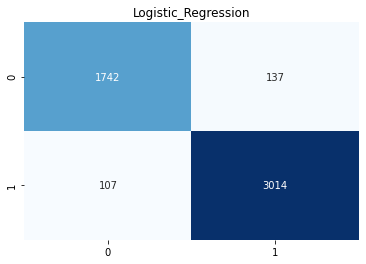

In [25]:
lr_cm=confusion_matrix(y_test,Y_pred_lr)
plt.title("Logistic_Regression")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [26]:
import pickle
with open('model_crop_Logistic_regression.sav','wb') as f:
    pickle.dump(lr,f)

# SVM Linear

In [27]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(x_train, y_train)

Y_pred_svm = sv.predict(x_test)
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 99.48 %


<AxesSubplot:title={'center':'SVM'}>

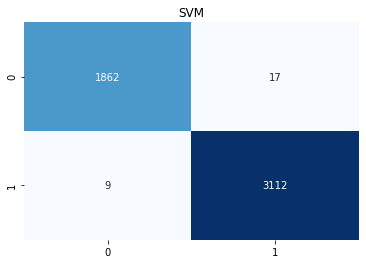

In [28]:
lr_cm=confusion_matrix(y_test,Y_pred_svm)
plt.title("SVM")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [29]:
import pickle
with open('model_crop_SVM.sav','wb') as f:
    pickle.dump(sv,f)

### Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)
nb.score(x_test,y_test)
Y_pred_nb = nb.predict(x_test)

In [31]:
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 99.46 %


<AxesSubplot:title={'center':'Naive Bayes'}>

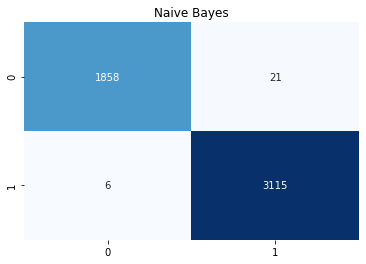

In [32]:
lr_cm=confusion_matrix(y_test,Y_pred_nb)
plt.title("Naive Bayes")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [33]:
import pickle
with open('model_crop_nb.sav','wb') as f:
    pickle.dump(nb,f)

# Decision Tree

In [34]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
Y_pred_dt = dt.predict(x_test)
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


<AxesSubplot:title={'center':'Decision Tree'}>

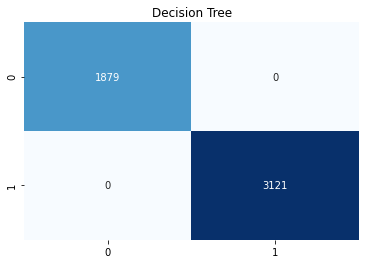

In [35]:
lr_cm=confusion_matrix(y_test,Y_pred_dt)
plt.title("Decision Tree")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [36]:
import pickle
with open('model_crop_dt.sav','wb') as f:
    pickle.dump(dt,f)

# Random Forest

In [37]:
rfc=RandomForestClassifier(n_estimators=10,n_jobs=2,verbose=2)
rfc.fit(x_train,y_train)
score_rf=rfc.score(x_test,y_test)
Y_pred_rf = rfc.predict(x_test)
score_rf=round(accuracy_score(Y_pred_rf,y_test)*100,2)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


In [38]:
score_rf

100.0

<AxesSubplot:title={'center':'Random Forest'}>

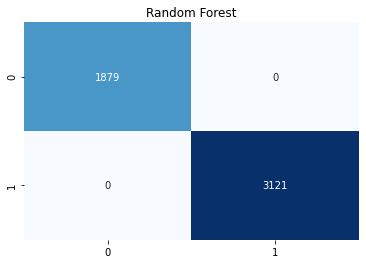

In [39]:
lr_cm=confusion_matrix(y_test,Y_pred_dt)
plt.title("Random Forest")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [40]:
import pickle
with open('model_crop_rf.sav','wb') as f:
    pickle.dump(rfc,f)

 # Adaptive Boost Classifier

In [41]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
ada.fit(x_train, y_train)
ada.score(x_test,y_test)
predictions = ada.predict(x_test)


In [42]:
score_ada = round(accuracy_score(predictions,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_ada)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


<AxesSubplot:title={'center':'ADA Boost'}>

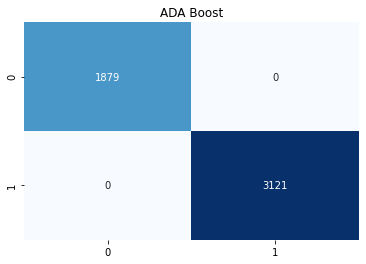

In [43]:
lr_cm=confusion_matrix(y_test,predictions)
plt.title("ADA Boost")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [44]:
import pickle
with open('model_crop_ada.sav','wb') as f:
    pickle.dump(ada,f)

In [72]:
import tensorflow as tf
from tensorflow import keras
model=tf.keras.Sequential([
    keras.layers.Dense(20,input_shape=(6,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

In [73]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [74]:
model.fit(x_train,y_train,epochs=300)

Epoch 1/300
157/157 [==============================] - 0s 748us/step - loss: 384.1159 - accuracy: 0.6060
Epoch 2/300
157/157 [==============================] - 0s 883us/step - loss: 13.5282 - accuracy: 0.6020
Epoch 3/300
157/157 [==============================] - 0s 794us/step - loss: 1.5782 - accuracy: 0.5842
Epoch 4/300
157/157 [==============================] - 0s 805us/step - loss: 0.7170 - accuracy: 0.5712
Epoch 5/300
157/157 [==============================] - 0s 819us/step - loss: 0.6759 - accuracy: 0.5718
Epoch 6/300
157/157 [==============================] - 0s 797us/step - loss: 0.6776 - accuracy: 0.5720
Epoch 7/300
157/157 [==============================] - 0s 779us/step - loss: 0.6715 - accuracy: 0.6232
Epoch 8/300
157/157 [==============================] - 0s 797us/step - loss: 0.6696 - accuracy: 0.6286
Epoch 9/300
157/157 [==============================] - 0s 827us/step - loss: 0.6687 - accuracy: 0.6228
Epoch 10/300
157/157 [==============================] - 0s 826us/step 

Epoch 80/300
157/157 [==============================] - 0s 819us/step - loss: 0.6597 - accuracy: 0.6286
Epoch 81/300
157/157 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.6286
Epoch 82/300
157/157 [==============================] - 0s 747us/step - loss: 0.6597 - accuracy: 0.6286
Epoch 83/300
157/157 [==============================] - 0s 820us/step - loss: 0.6598 - accuracy: 0.6286
Epoch 84/300
157/157 [==============================] - 0s 966us/step - loss: 0.6597 - accuracy: 0.6286
Epoch 85/300
157/157 [==============================] - 0s 731us/step - loss: 0.6597 - accuracy: 0.6286
Epoch 86/300
157/157 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.6286
Epoch 87/300
157/157 [==============================] - 0s 813us/step - loss: 0.6597 - accuracy: 0.6286
Epoch 88/300
157/157 [==============================] - 0s 781us/step - loss: 0.6597 - accuracy: 0.6286
Epoch 89/300
157/157 [==============================] - 0s 718us/ste

Epoch 157/300
157/157 [==============================] - 0s 743us/step - loss: 0.6597 - accuracy: 0.6286
Epoch 158/300
157/157 [==============================] - 0s 716us/step - loss: 0.6597 - accuracy: 0.6286
Epoch 159/300
157/157 [==============================] - 0s 744us/step - loss: 0.6597 - accuracy: 0.6286
Epoch 160/300
157/157 [==============================] - 0s 775us/step - loss: 0.6597 - accuracy: 0.6286
Epoch 161/300
157/157 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.6286
Epoch 162/300
157/157 [==============================] - 0s 811us/step - loss: 0.6597 - accuracy: 0.6286
Epoch 163/300
157/157 [==============================] - 0s 750us/step - loss: 0.6597 - accuracy: 0.6286
Epoch 164/300
157/157 [==============================] - 0s 753us/step - loss: 0.6597 - accuracy: 0.6286
Epoch 165/300
157/157 [==============================] - 0s 864us/step - loss: 0.6597 - accuracy: 0.6286
Epoch 166/300
157/157 [==============================] - 

In [75]:
model.evaluate(x_test,y_test)

157/157 [==============================] - 0s 591us/step - loss: 0.6642 - accuracy: 0.6200


[0.6642176508903503, 0.6200000047683716]

In [76]:
pred=model.predict(x_test)

In [77]:
pred

array([[0.6294128],
       [0.6294128],
       [0.6294128],
       ...,
       [0.6294128],
       [0.6294128],
       [0.6294128]], dtype=float32)

In [78]:
pred_new=[]
for m in pred:
    if m>0.6:
        pred_new.append(1)
    else:
        pred_new.append(0)

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:title={'center':'ANN'}>

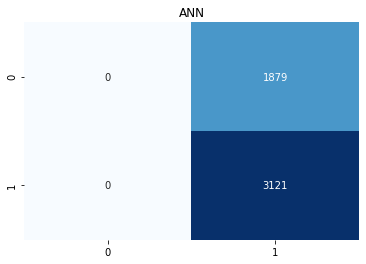

In [53]:
lr_cm=confusion_matrix(y_test,pred_new)
plt.title("ANN")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [54]:
#accuracy
round((1684+2850)/(1684+154+312+2850),2)

0.91

In [55]:
# Feed Forwarding also called MLP


In [56]:
from sklearn.neural_network import MLPClassifier

In [57]:
mlp=MLPClassifier(hidden_layer_sizes=(3,2),max_iter=500,activation='relu')


In [58]:
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [59]:
pred=mlp.predict(x_test)

In [60]:
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

<AxesSubplot:title={'center':'Feed Forwarding'}>

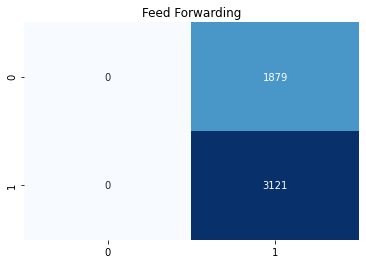

In [61]:
lr_cm=confusion_matrix(y_test,pred)
plt.title("Feed Forwarding")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [62]:
3162/(3162+1838)

0.6324

In [63]:
score_mlp = round(accuracy_score(pred,y_test)*100,2)

In [64]:
score_mlp

62.42

In [65]:
#very low accuracy

In [ ]:
import matplotlib.pyplot as plt
 
values = [95.12, 99.48, 30.68,0.0]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
labels = ['Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest']
explode = (0.1, 0, 0, 0)
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('Precision chart')
plt.legend(labels,loc=3)
plt.show()